In [1]:
import os
import torch
import numpy as np

import scanpy as sc
from anndata import AnnData
import anndata as ad

result_dir = "../edges/"
raw_type=False
use_edge=True

In [2]:
import matplotlib.pyplot as plt
# Set global font sizes using rcParams
plt.rcParams.update({
    'font.size': 18,            # Global font size
    'axes.titlesize': 20,       # Font size of the axes title
    'axes.labelsize': 20,       # Font size of the x and y labels
    'xtick.labelsize': 16,      # Font size of the x-tick labels
    'ytick.labelsize': 16,      # Font size of the y-tick labels
    'legend.fontsize': 18,      # Font size of the legend
    'figure.titlesize': 24      # Font size of the figure title
})

In [3]:
sample='mouse1_slice201'#.pth
data_dir = "../../data/Mouse_brain/processed1/"
str_position_x='centerx'
str_position_y='centery'
str_cell_type='subclass'

genes = torch.load("/".join(data_dir.split("/")[:-2]) + "/genes.pth")
print(genes)
type_exp_dict=np.load(data_dir + sample + "_TypeExp.npz", allow_pickle=True)

cell_types=['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT',
                    'L6 IT Car3', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'PVM', 'Peri', 'Pvalb', 'SMC', 'Sncg',
                    'Sst', 'VLMC', 'Vip', 'other']

cell_type_pair_sequence=[]
for cell_typei in cell_types:
    for cell_typej in cell_types:
        cell_type_pair_sequence.append(cell_typei+"->"+cell_typej)

feature_names=[]
for i in range(len(cell_types)):
    for j in range(len(genes)):
        feature_names.append(cell_types[i]+"--"+genes[j])

['1700022I11Rik', '1810046K07Rik', '5031425F14Rik', '5730522E02Rik', 'Acta2', 'Adam2', 'Adamts2', 'Adamts4', 'Adra1b', 'Alk', 'Ankfn1', 'Ano4', 'Aqp4', 'Asic4', 'B4galnt2', 'B4galnt3', 'Barx2', 'Bcl11b', 'Bdnf', 'Bgn', 'Blnk', 'Bmpr1b', 'Brinp3', 'C1ql3', 'C1qtnf7', 'Cacng5', 'Calb2', 'Camk2d', 'Car3', 'Cbln2', 'Cbln4', 'Ccbe1', 'Ccdc162', 'Ccdc3', 'Ccdc80', 'Ccnb1', 'Cd14', 'Cd24a', 'Cdca7', 'Cdcp1', 'Cdh12', 'Cdh13', 'Cdh20', 'Cdh9', 'Ceacam9', 'Cemip', 'Chat', 'Chn2', 'Chodl', 'Chrm2', 'Chrna2', 'Cldn5', 'Clrn1', 'Cntnap5b', 'Cobll1', 'Col14a1', 'Col15a1', 'Col23a1', 'Col24a1', 'Col25a1', 'Corin', 'Cplx3', 'Crhr2', 'Crispld2', 'Cspg4', 'Ctss', 'Cux2', 'Cxcl14', 'Daam2', 'Dmkn', 'Dnase1l3', 'Dscaml1', 'Egfem1', 'Egfr', 'Egln3', 'Egr2', 'Elfn1', 'Enpp6', 'Epha7', 'Fam19a2', 'Fam84b', 'Fbxl7', 'Fezf2', 'Flrt3', 'Flt1', 'Fndc7', 'Fosb', 'Foxp2', 'Frem2', 'Fst', 'Gfap', 'Glra1', 'Gpc6', 'Grik1', 'Grin3a', 'Grm1', 'Grm8', 'Hpse', 'Hs3st5', 'Igf2', 'Igfbp4', 'Igfbp5', 'Ikzf2', 'Il1rapl2', 

torch.Size([6137, 49]) tensor([[0.0681, 0.5617, 0.3476,  ..., 0.0331, 0.0139, 0.0274],
        [0.2219, 0.0557, 0.1398,  ..., 0.0368, 0.0111, 0.0111],
        [0.1373, 0.0552, 0.0492,  ..., 0.2087, 0.0102, 0.0102],
        ...,
        [0.3422, 0.1273, 0.0315,  ..., 0.0199, 0.0220, 0.0237],
        [0.0526, 0.0206, 0.0193,  ..., 0.0188, 0.1898, 0.0137],
        [0.0582, 0.0966, 0.0667,  ..., 0.0173, 0.0130, 0.0772]]) tensor([3.5971, 1.9701, 1.4802,  ..., 1.4234, 1.8674, 2.5125])
(300713,) (300713,)


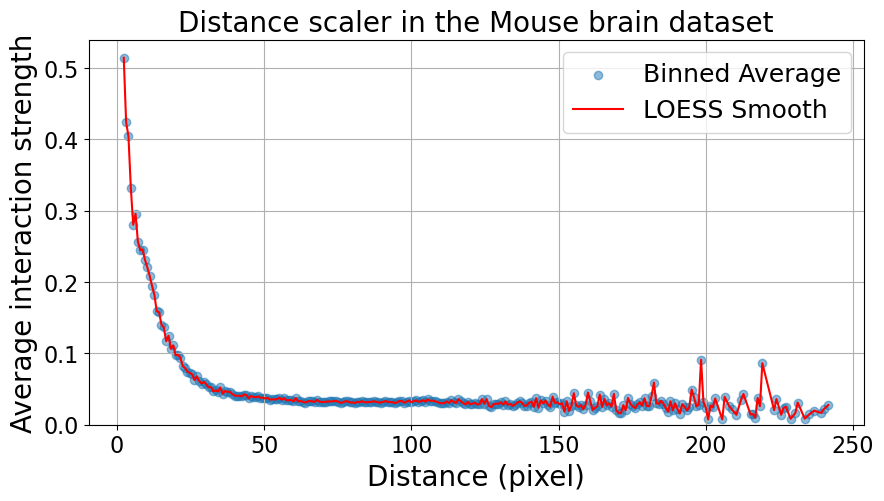

In [6]:
from scipy.stats import binned_statistic
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_binned_average_with_loess(x, y, bins=300, frac=0.013):
    # Bin data and compute average y for each bin
    bin_means, bin_edges, binnumber = binned_statistic(x, y, statistic='mean', bins=bins)
    bin_width = bin_edges[1] - bin_edges[0]
    bin_centers = bin_edges[:-1] + bin_width / 2

    # Calculate the smooth curve using Lowess
    lowess = sm.nonparametric.lowess
    smoothed_data = lowess(bin_means, bin_centers, frac=frac)
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.scatter(bin_centers, bin_means, alpha=0.5, label='Binned Average')
    plt.plot(smoothed_data[:, 0], smoothed_data[:, 1], 'r-', label='LOESS Smooth')
    plt.title("Distance scaler in the Mouse brain dataset")
    plt.xlabel("Distance (pixel)")
    plt.ylabel("Average interaction strength")
    plt.ylim(bottom=0)  # Set the y-axis to start from 0
    plt.legend()
    plt.grid(True)
    plt.savefig("./figures/distance_scaler.pdf", bbox_inches='tight')
    plt.show()

def plot_distance_info(sample,gene="all",use_rank=False,cumsum=False):
    results=torch.load(result_dir+"edges_"+sample+".pth",map_location=torch.device('cpu'))
    attention_scores=results["attention_score"]
    
    proportion=torch.abs(attention_scores)
    #proportion=proportion/torch.sum(proportion,dim=1,keepdim=True)
    if gene=="all":
        proportion=torch.mean(proportion,dim=-1)
    else:
        proportion=proportion[:,:,genes.index(gene)]

    if cumsum:
        proportion=np.cumsum(proportion,axis=-1)
    
    print(proportion.shape,proportion,torch.sum(proportion,dim=1))

    position_xs=results["position_x"][:,1:]
    position_ys=results["position_y"][:,1:]
    position_x0=results["position_x"][:,0:1]
    position_y0=results["position_y"][:,0:1]
    distances=torch.sqrt(torch.square(position_xs-position_x0)+torch.square(position_ys-position_y0))

    proportion=proportion.flatten().numpy()
    distance=distances.flatten().numpy()

    if use_rank:
        n=attention_scores.shape[1]
        tmp=np.arange(n)+1
        distance=np.tile(tmp, (attention_scores.shape[0], 1)).flatten()
    
    print(distance.shape,proportion.shape)
    plot_binned_average_with_loess(distance,proportion)

plot_distance_info(sample) 

torch.Size([6137, 49]) tensor([[0.4034, 0.6149, 1.3531,  ..., 0.1933, 0.0198, 0.1882],
        [0.3336, 0.3656, 0.6500,  ..., 0.0761, 0.0195, 0.0195],
        [0.0203, 0.0426, 0.0380,  ..., 0.1471, 0.0270, 0.0270],
        ...,
        [0.3521, 0.1604, 0.0785,  ..., 0.0219, 0.0414, 0.0304],
        [0.1580, 0.0655, 0.0600,  ..., 0.0382, 0.7962, 0.0283],
        [0.0284, 0.3347, 0.2737,  ..., 0.0312, 0.0229, 0.0438]]) tensor([11.9659,  6.9374,  2.3661,  ...,  2.0954,  5.2833,  3.7441])
(300713,) (300713,)


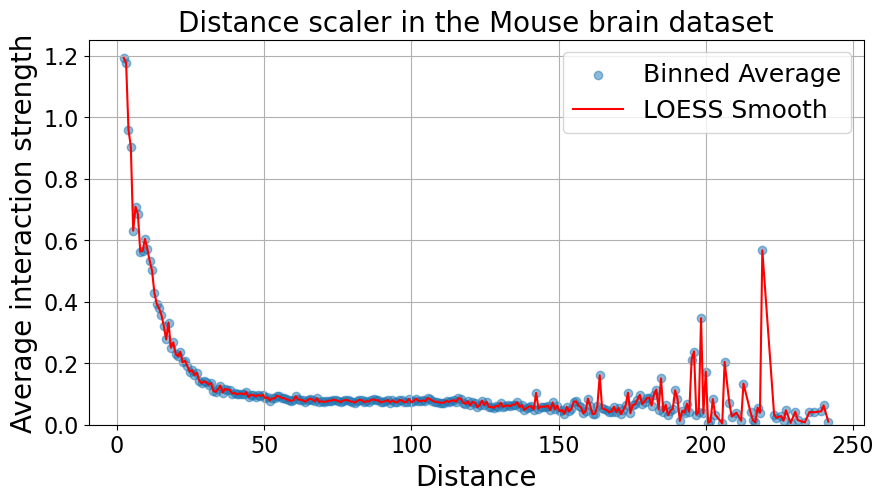

In [5]:
plot_distance_info(sample,"Rorb") 

torch.Size([6137, 49]) tensor([[0.0193, 0.1652, 0.0886,  ..., 0.0093, 0.0042, 0.0076],
        [0.1286, 0.0288, 0.0692,  ..., 0.0223, 0.0050, 0.0050],
        [0.0889, 0.0349, 0.0310,  ..., 0.1366, 0.0069, 0.0069],
        ...,
        [0.2374, 0.0818, 0.0244,  ..., 0.0148, 0.0151, 0.0179],
        [0.0312, 0.0110, 0.0100,  ..., 0.0108, 0.1016, 0.0082],
        [0.0251, 0.0387, 0.0283,  ..., 0.0068, 0.0058, 0.0286]]) tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])
(300713,) (300713,)


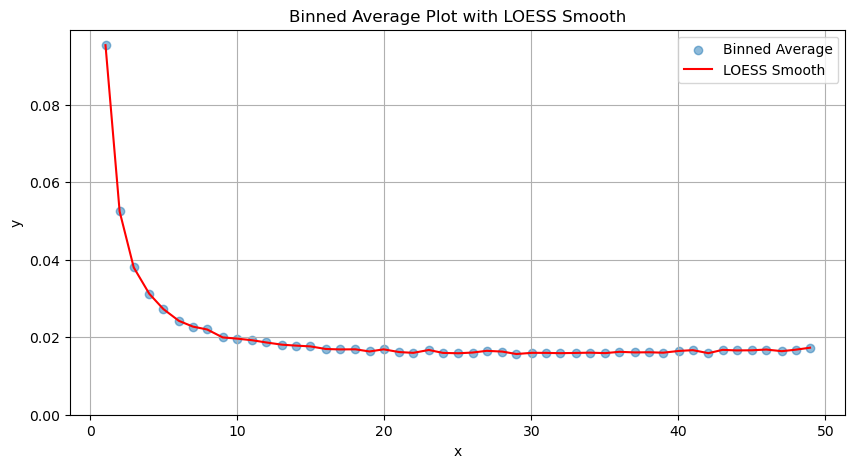

In [5]:
plot_distance_info(sample,use_rank=True) 

torch.Size([6137, 49]) tensor([[0.0193, 0.1845, 0.2731,  ..., 0.9882, 0.9924, 1.0000],
        [0.1286, 0.1574, 0.2266,  ..., 0.9900, 0.9950, 1.0000],
        [0.0889, 0.1238, 0.1549,  ..., 0.9863, 0.9931, 1.0000],
        ...,
        [0.2374, 0.3192, 0.3436,  ..., 0.9670, 0.9821, 1.0000],
        [0.0312, 0.0422, 0.0522,  ..., 0.8902, 0.9918, 1.0000],
        [0.0251, 0.0638, 0.0921,  ..., 0.9656, 0.9714, 1.0000]]) tensor([28.3910, 30.3953, 23.4553,  ..., 33.3577, 22.9944, 26.2152])
(300713,) (300713,)


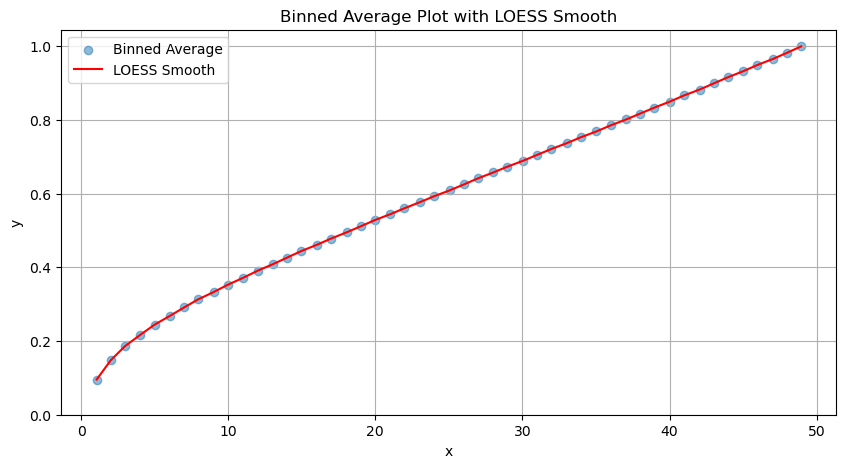

In [6]:
plot_distance_info(sample,use_rank=True,cumsum=True)